# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [55]:
m = 1
A = 0.0001#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [56]:
#Logarithmic grid ON/OFF
global loggrid=false
global bisection=false;

In [57]:
using Quadmath, Printf

res=m;
N=2.0^m*500.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
Nt=2.0^m*500.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [58]:
print(N)

500.0

In [59]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [60]:
using Printf
include("./ScalarField.jl");
include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [61]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)

initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    xtilde=integrate(loggridfunc,0,initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.002
the time step is 0.001


# Initial data of m β Ψ and Ψ,x

In [62]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [63]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [64]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [65]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);
state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

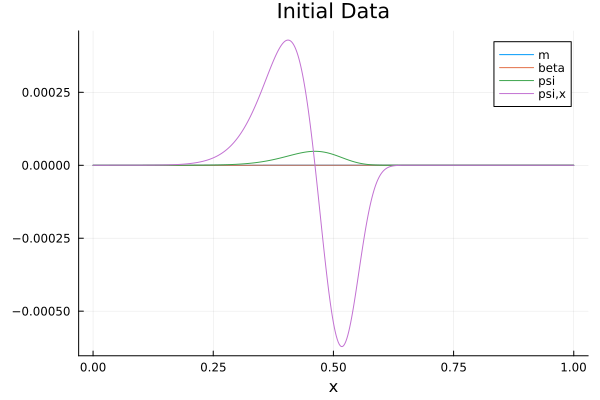

In [66]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

In [67]:
"""using TickTock
tick()
a=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5])#doublegrid(initX1)
tock()

tick()
f=Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
b=f(initX1)

#println(a.-b)
tock()

#plot(initX1, a.-init_gaussian_der(initX1,r0,sigma,A))
plot(doublegrid(initX1), a.-init_gaussian_der(doublegrid(initX1),r0,sigma,A))""";


# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [68]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [69]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [70]:
ginit=speed(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.0080240641603853


In [71]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [54]:
finaltime=1.0#1.3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

LoadError: InterruptException:

In [72]:
aux=zeros(length(initX1))
for i in 4:length(initX1)-3
    aux[i]=Der(state_array,i,1,initX)
end
plot(initX1, aux)
x1=initX1
y1=aux

501-element Vector{Float64}:
 0.0
 0.0
 0.0
 1.4035315752697488e-21
 6.081026415109161e-22
 3.464581042386153e-21
 1.3201738766186219e-20
 3.899187901107934e-20
 9.654725320001511e-20
 2.106500693755448e-19
 4.18372132795858e-19
 7.73138554503673e-19
 1.3498172103151317e-18
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [36]:
"""aux2=zeros(length(initX1))
for i in 4:length(initX1)-3
    aux2[i]=Der(state_array,i,1,initX)
end
plot(initX1, aux2)

x2=initX1
y2=aux2"""

501-element Vector{Float64}:
 0.0
 0.0
 0.0
 1.4035315752697488e-21
 6.081026415109161e-22
 3.464581042386153e-21
 1.3201738766186219e-20
 3.899187901107934e-20
 9.654725320001511e-20
 2.106500693755448e-19
 4.18372132795858e-19
 7.73138554503673e-19
 1.3498172103151317e-18
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

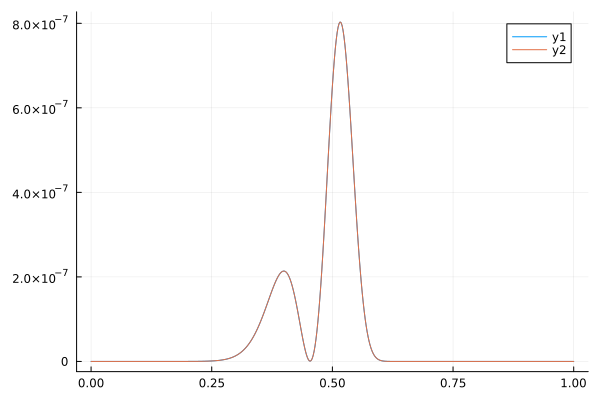

In [73]:
plot([x1 x2],[y1 y2])

In [ ]:
#############3

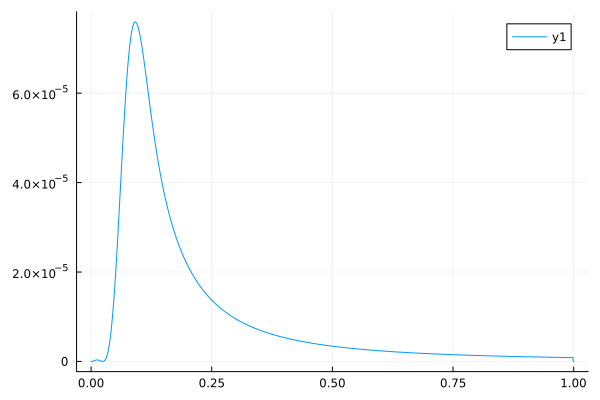

In [1020]:
loggridfunc(initX1)

1001-element Vector{Float64}:
 0.6692850924284856
 0.6692857572344806
 0.669287751656401
 0.6692910757060537
 0.6692957294031151
 0.6693017127751351
 0.6693090258575328
 0.6693176686936009
 0.6693276413345036
 0.6693389438392775
 0.6693515762748335
 0.6693655387159562
 0.6693808312453039
 ⋮
 1.760381559006927
 1.7638072953280133
 1.7672430502925354
 1.770688855867227
 1.7741447441326843
 1.777610747283795
 1.781086897630148
 1.7845732275964643
 1.7880697697230228
 1.7915765566660762
 1.7950936211982882
 1.798620996209156

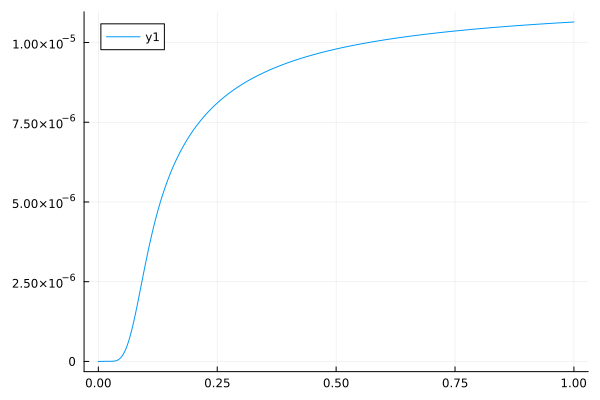

In [970]:
plot(initX1,state_array[4:L-3,1])

In [ ]:
plot(initX1, loggridfunc(initX1))

In [636]:
print(T_interp);

[0.0, 0.0020833335000000008, 0.0041666670000000015, 0.006250000500000003, 0.008333334000000001, 0.010416667499999994, 0.012500000999999986, 0.014583334499999979, 0.01666666799999997, 0.018750001499999964, 0.020833334999999956, 0.02291666849999995, 0.02500000199999994, 0.027083335499999934, 0.029166668999999926, 0.03125000249999992, 0.033333335999999915, 0.03541666949999991, 0.0375000029999999, 0.03958333649999989, 0.041666669999999885, 0.04375000349999988, 0.04583333699999987, 0.04791667049999986, 0.050000003999999855, 0.05208333749999985, 0.05416667099999984, 0.05625000449999983, 0.058333337999999825, 0.06041667149999982, 0.06250000499999982, 0.06458333849999988, 0.06666667199999994, 0.0687500055, 0.07083333900000006, 0.07291667250000013, 0.07500000600000019, 0.07708333950000025, 0.07916667300000031, 0.08125000650000037, 0.08333334000000044, 0.0854166735000005, 0.08750000700000056, 0.08958334050000062, 0.09166667400000068, 0.09375000750000075, 0.09583334100000081, 0.09791667450000087,

 1.0583334180000705, 1.0604167515000709, 1.0625000850000712, 1.0645834185000715, 1.0666667520000719, 1.0687500855000722, 1.0708334190000726, 1.072916752500073, 1.0750000860000732, 1.0770834195000736, 1.079166753000074, 1.0812500865000743, 1.0833334200000746, 1.085416753500075, 1.0875000870000753, 1.0895834205000756, 1.091666754000076, 1.0937500875000763, 1.0958334210000766, 1.097916754500077, 1.1000000880000773, 1.1020834215000777, 1.104166755000078, 1.1062500885000783, 1.1083334220000787, 1.110416755500079, 1.1125000890000794, 1.1145834225000797, 1.11666675600008, 1.1187500895000804, 1.1208334230000807, 1.122916756500081, 1.1250000900000814, 1.1270834235000817, 1.129166757000082, 1.1312500905000824, 1.1333334240000827, 1.135416757500083, 1.1375000910000834, 1.1395834245000838, 1.141666758000084, 1.1437500915000844, 1.1458334250000848, 1.1479167585000851, 1.1500000920000855, 1.1520834255000858, 1.1541667590000861, 1.1562500925000865, 1.1583334260000868, 1.1604167595000872, 1.1625000930

In [858]:
1560*2*2

6240

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.0001.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.0001.gif")
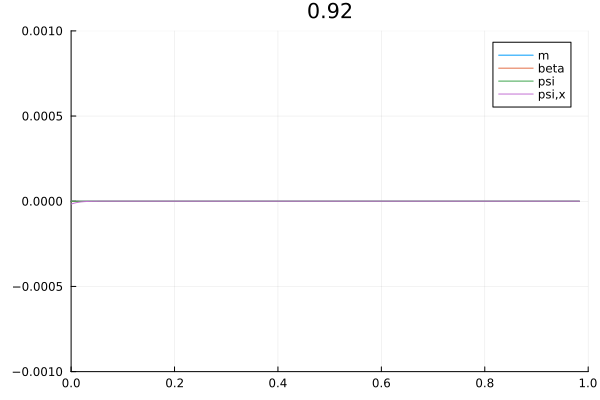

In [1311]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 920:1:920
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    temp=round(n*dt,digits=3)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp",ylim=[-0.001, 0.001],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

In [1312]:
920*dt

0.92

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
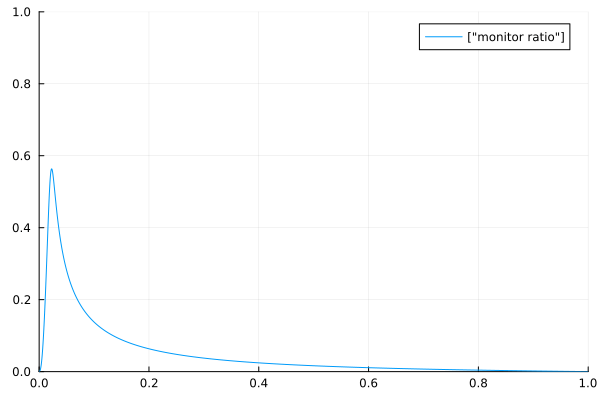

In [271]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)